# DSI Capstone Project: Airbnb Rentals Price Prediction

## Problem Statement

Since 2008, Airbnb is a fast-growing online marketplace for lodging, primarily homestays for vacation rental, and tourism activities. Millions of guests and hosts have used Airbnb to expand on traveling possibilites and present a more unique, personalized way of experiencing the world. With that being said, millions of listings generate a lot of data, which can be analyzed and used to understand customers' and hosts' better in terms of behaviors and platform usage. 

New York City has been one of the hottest markets for Airbnb, with over 7.9 million active listings as of December 2020, a 2.6% increase from 7.7 million active listings in 2019. Having personal interest in renting Airbnb in New York City in this upcoming months and its location being one of the top major cities with highest active Airbnb listings, I will build a regression model to predict the rental price of Airbnb in New York City based on the dataset collected and identify the factors affecting the price of those Airbnb. The result will be helpful to Airbnb's data analysis team as well as Airbnb hosts who are looking to increase the price of their Airbnb properties. 

Model performance will be evaluated by RMSE, and the model should at least improve upon baseline by 10%. Baseline is defined as the mean of the target variable. 

## Executive Summary

I started off the project by importing the relevant libraries and the dataset: nyc. First, I explored the data by looking at size and general information of the datasets. Then, I began cleaning the dataset by filling in the missing data as we cannot have null values in our model and drop some irrelevant columns. I explored the data visualization of the dataset through bar charts, histograms, heat map, and box plots. The visualization provided the insights in terms of correlation and outliers between the target variable and other features. I also created dummy variables for nominal data and dropped some outliers to ensure better prediction for the model. 

I used train/test split to seperate datasets for training and testing. Then, I created the model benchmarks and linear regression model. I used R2 and RMSE as evaluation metrics for my model. Additionally, I used Ridge and Lasso regression to regularize my regression model. After finding the optimal alpha, I ran the models to find that Lasso regression performed slightly better than Ridge regression, hence I used Lasso model for my final evaluation, which I successfully achieved my goal of obtaining 27% better RMSE than the baseline model. 

## Directory

1. [Dataset](#Dataset)
2. [Cleaning & Preprocessing](#Cleaning-&-Preprocessing)
3. [EDA](#EDA)
4. [Modeling](#Modeling)
5. [Model Evaluation](#Model-Evaluation)
6. [Conclusion & Recommendation](#Conclusion-&-Recommendation)
 

## Importing Packages

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso,  ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Dataset

### Data Dictionary

The data collected is the detailed listings data of Airbnb in New York City collected from airbnb website by http://insideairbnb.com/get-the-data.html , which is an independent, non-commercial set of tools and data that allow the community to explore how Airbnb is being used in cities around the world, as of February 4th, 2021. The dataset is composed of 16 columns and 37,012 rows. The columns correspond to each variable and the rows correspond to each advertisement/listing published on Airbnb.com across New York City.

       
| Feature                      | Variable type | Datatype | Dataset   | Description                                                                     |
|------------------------------|---------------|----------|-----------|---------------------------------------------------------------------------------|
| id                           | Norminal      | int64    | nyc       | Unique id assigned to the property                                                          |
| name                         | Norminal      | object   | nyc       | Name or description of airbnb                                             |
| host_id                      | Norminal      | int64    | nyc       | unique id assigned to the host                                    |
| host_name                    | Norminal      | object   | nyc       | Name of the host                                                            || neighbourhood+h              
| neighbourhood_group          | Norminal      | object   | nyc       | Neighbourhood group of airbnb                                                           |
| neighbourhood                | Norminal      | object   | nyc       | Neighbourhood name of airbnb                                           |
| latitude                     | Continuous    | float64  | nyc       | property latitude                                    |
| longtitude                   | Continuous    | float64  | nyc       | property longtitude     
| room_type                    | Norminal      | object   | nyc       | Type of room of airbnb                                                           |
| price                        | Discrete      | int64    | nyc       | Price per night of airbnb                                             |
| minimum_nights               | Discrete      | int64    | nyc       | Minimum nights required to stay at airbnb                                     |
| number_of_reviews            | Discrete      | int64    | nyc       | Number of reviews this airbnb received    
| last_review                  | Datetime      | object   | nyc       | Last review date for this airbnb                                                           |
| reviews_per_month            | Continuous    | float64  | nyc       | Number of reviews per month this airbnb received                                          |
| calculated_host_listings_count | Norminal      | int64   | nyc     | Number of the host properties                                     |
| availability_365                     | Norminal      | int64    | nyc     | Number of available days of this Airbnb within the year   


In [2]:
#import dataset
nyc = pd.read_csv('file/listings.csv')

## Cleaning & Preprocessing

In [3]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,2020-09-25,3.31,1,343
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.85,1,0


In [4]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,2020-09-25,3.31,1,343
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.85,1,0


In [6]:
nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.701200e+04,3.701200e+04,37012.000000,37012.000000,37012.000000,37012.000000,37012.000000,27489.000000,37012.000000,37012.000000
mean,2.510589e+07,9.370949e+07,40.729653,-73.950989,142.842240,23.323679,22.904112,0.867197,9.405220,130.282800
std,1.517880e+07,1.101374e+08,0.054710,0.048291,275.740987,26.441255,47.864720,1.320503,31.613257,146.635272
min,2.595000e+03,2.438000e+03,40.508680,-74.239860,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.103335e+07,9.643914e+06,40.690320,-73.983812,60.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,2.485448e+07,4.023649e+07,40.725465,-73.955790,99.000000,30.000000,4.000000,0.360000,1.000000,66.000000
75%,3.982193e+07,1.529683e+08,40.762480,-73.933720,151.000000,30.000000,20.000000,1.120000,2.000000,292.000000
max,4.803978e+07,3.870718e+08,40.912140,-73.710870,10000.000000,1250.000000,753.000000,40.310000,255.000000,365.000000


In [7]:
#check the size of nyc dataset
nyc.shape

(37012, 16)

In [8]:
#check the info of nyc dataset
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37012 entries, 0 to 37011
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37012 non-null  int64  
 1   name                            36999 non-null  object 
 2   host_id                         37012 non-null  int64  
 3   host_name                       36994 non-null  object 
 4   neighbourhood_group             37012 non-null  object 
 5   neighbourhood                   37012 non-null  object 
 6   latitude                        37012 non-null  float64
 7   longitude                       37012 non-null  float64
 8   room_type                       37012 non-null  object 
 9   price                           37012 non-null  int64  
 10  minimum_nights                  37012 non-null  int64  
 11  number_of_reviews               37012 non-null  int64  
 12  last_review                     

#### Checking missing values

In [9]:
#look for null values in nyc dataset
nyc.isnull().sum().sort_values().tail(5)

availability_365        0
name                   13
host_name              18
last_review          9523
reviews_per_month    9523
dtype: int64

In [10]:
#check the percentage of null values out of total samples
9523/37012

0.25729493137360854

"name" is irrelevant and insignificant to our analysis, I will impute the missing value with NA.

In [11]:
#fill in the missing value in "name" with NA
nyc['name'] = nyc['name'].fillna('NA')

After looking at the dataset, I found that the missing "last_review" and "reviews_per_month" values can come from two reasons: no one has ever stayed on that Airbnb or no reviews has been left for that Airbnb. Since "last_review" column is irrelevant and insignificant for our analysis, along with "id" and "host_name" , I will drop these columns and impute missing value in "reviews_per_month" with 0.

In [12]:
#drop columns that are not significant
nyc.drop(['id','last_review','host_name'], axis=1, inplace=True)

In [13]:
#fill in the missing value in "review_per_month" with 0
nyc['reviews_per_month'] = nyc['reviews_per_month'].fillna('0') 

#### Dropping outliers

Price is our target variable for this model. Since mean price of the total Airbnb NYC is 142 dollars, it might be a good idea to focus only at the listings which has price under $200.

In [14]:
#First, drop records where price = 0 as it does not make any sense
nyc = nyc[nyc['price'] > 0]

In [15]:
nyc.shape

(36984, 13)

In [16]:
#check mean price
nyc['price'].mean()

142.95038394981614

In [17]:
#check the proportion of property price under $200
nyc[nyc['price']<200].value_counts().sum()

31063

In [18]:
31055/36984

0.8396874324032014

In [19]:
#drop any property with price higher than $200
nyc = nyc[nyc['price'] < 200]

In [20]:
nyc['price'].describe()

count    31063.000000
mean        91.964041
std         43.952761
min         10.000000
25%         55.000000
50%         85.000000
75%        123.000000
max        199.000000
Name: price, dtype: float64

The average price is 91 dollars while price varies between 10 and 199 dollars.

In [21]:
nyc.shape

(31063, 13)

In [22]:
#Again, see if there are still any null values in nyc dataset
nyc.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
nyc.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,0.35,2,365
1,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,4.99,1,249
2,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,0.35,1,365
3,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,3.31,1,343
4,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,0.85,1,0


I finished imputing the missing value for the dataset and dropping irrelevant columns.

Now, I will use exploratory visualization to look at relationships between features.

## EDA

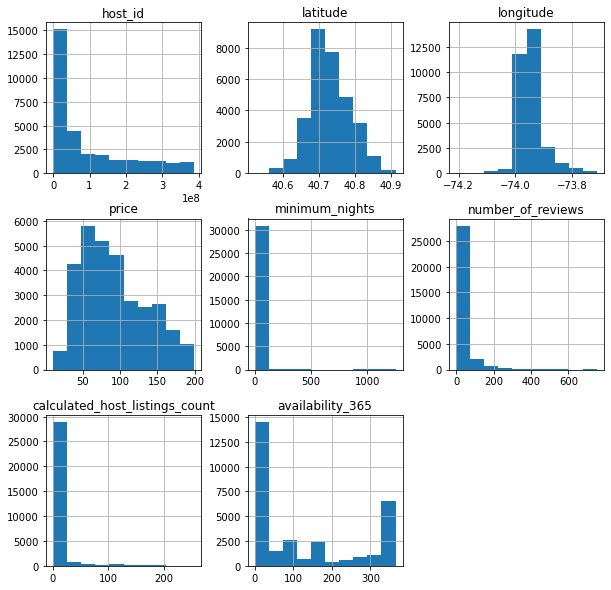

In [24]:
#create histogram
nyc.hist(figsize=(10,10));

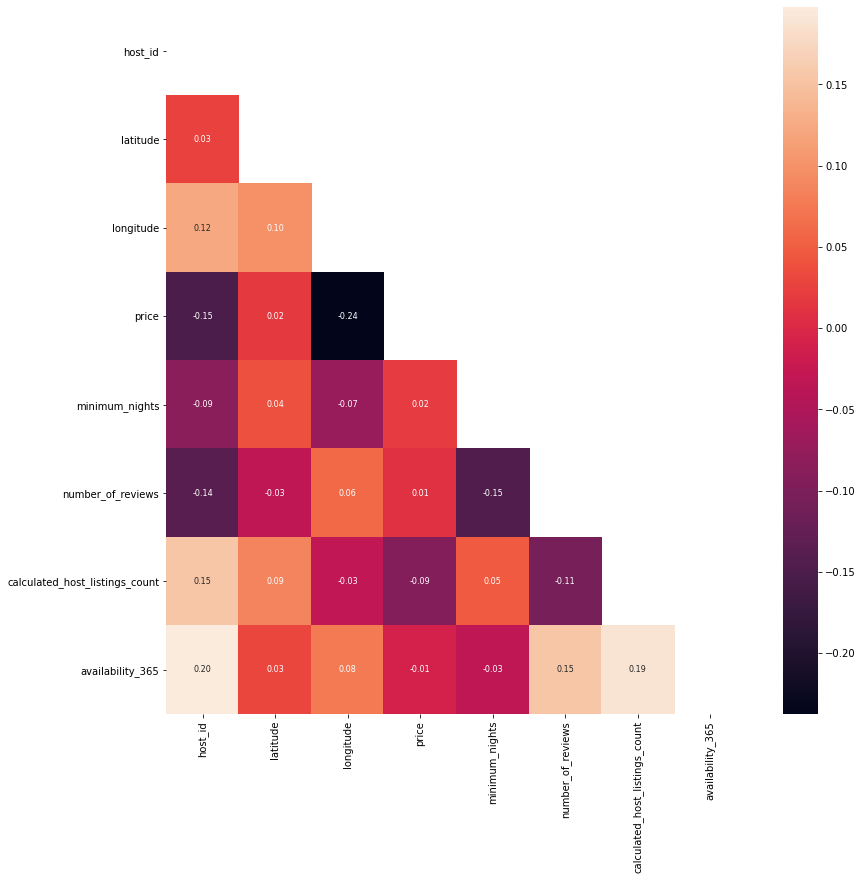

In [25]:
nyc_correlation = nyc.corr()
mask = np.zeros_like(nyc_correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(13, 13))
heatmap = sns.heatmap(nyc_correlation, annot=True, annot_kws={"size":8}, fmt='.2f', mask=mask)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

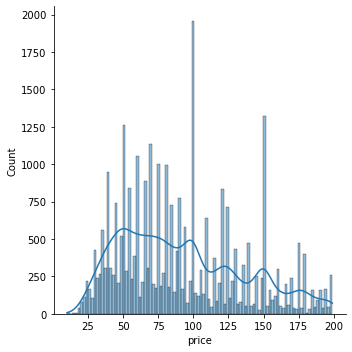

In [26]:
#price distribution
sns.displot(data=nyc,x="price",bins=100, kde=True);

In [27]:
nyc['price']

0        100
1         73
2         60
3         79
4         75
        ... 
37006    103
37007     90
37009     63
37010     67
37011     66
Name: price, Length: 31063, dtype: int64

In [28]:
nyc['price'].mean()

91.96404082026848

### 1. Availability

Text(0.5, 1.0, 'Boxplot of availability')

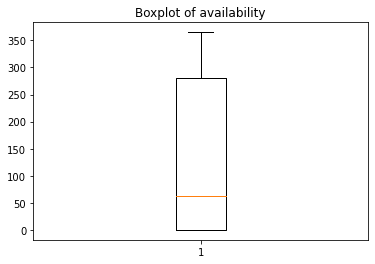

In [29]:
plt.boxplot(nyc['availability_365']);
#plt.set_xticks(['availability'])     
plt.title('Boxplot of availability')

In [30]:
nyc['availability_365'].describe()

count    31063.000000
mean       127.620417
std        145.581724
min          0.000000
25%          0.000000
50%         63.000000
75%        281.000000
max        365.000000
Name: availability_365, dtype: float64

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


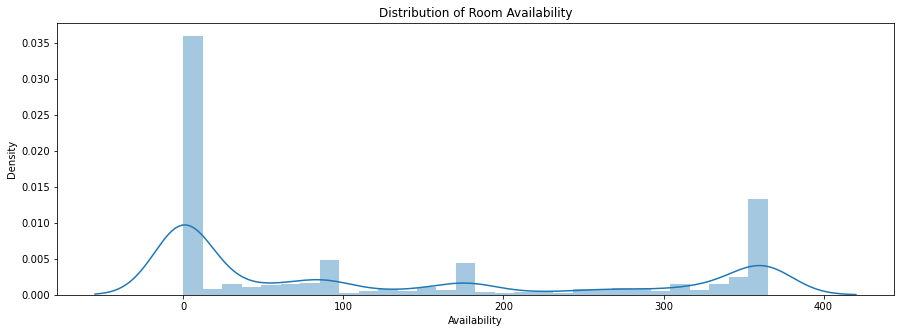

In [31]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(nyc.availability_365, bins=30)
plt.title("Distribution of Room Availability")
plt.xlabel('Availability')
plt.show();

While the availability of rooms in different neighbourhood groups ranges from 0-365, majority of them are either empty or fully booked the whole year.

In [32]:
nyc[nyc['availability_365'] < 10].value_counts().sum()

13531

In [33]:
13531/31063

0.43559862215497536

43% of total Airbnb in NYC are fully booked (have no availability)

In [34]:
#
#av1 = nyc[nyc['availability_365'] < 90] #3 months
#av2 = nyc[nyc['availability_365'] < 180] #6 months 
#av3 = nyc[nyc['availability_365'] < 270] #9 months
#av4 = nyc[nyc['availability_365'] < 270] #quarter 4 

In [35]:
#
av1 = nyc[nyc['availability_365'] < 90].value_counts().sum() #less than 3 months
av2 = nyc[(nyc['availability_365'] > 90) & (nyc['availability_365'] < 180)].value_counts().sum() #3-6 months 
av3 = nyc[(nyc['availability_365'] > 180) & (nyc['availability_365'] < 270)].value_counts().sum() #6-9 months
av4 = nyc[(nyc['availability_365'] > 270) & (nyc['availability_365'] < 365)].value_counts().sum() #9-12 months
av = [av1, av2, av3, av4]

In [36]:
print("Number of rooms available for less than 3 months: {}".format(av1))
print("Number of rooms available for 3 to 6 months: {}".format(av2))
print("Number of rooms available for 6 to 9 months: {}".format(av3))
print("Number of rooms available for 9 to 12 months: {}".format(av4))
      
#price_avrg=top_reviewed_listings.price.mean()
#print('Average price per night: {}'.format(price_avrg))

Number of rooms available for less than 3 months: 17754
Number of rooms available for 3 to 6 months: 2914
Number of rooms available for 6 to 9 months: 1391
Number of rooms available for 9 to 12 months: 5395


In [37]:
17754/31063

0.57154814409426

57% of Airbnb in NYC are available for less than 3 months. Majority of the rooms have 0 availability means that majority of Airbnb are popular

### 2. Neighborhood

In [38]:
nyc.neighbourhood.nunique

<bound method IndexOpsMixin.nunique of 0                   Midtown
1              Clinton Hill
2        Bedford-Stuyvesant
3                   Midtown
4           Upper West Side
                ...        
37006    Financial District
37007              Woodside
37009               Midtown
37010       Upper East Side
37011       Upper West Side
Name: neighbourhood, Length: 31063, dtype: object>

In [39]:
nyc.neighbourhood_group.value_counts().sum()

31063

In [40]:
#neighbor with highest number of Airbnb
neighbor = nyc.value_counts('neighbourhood').sort_values(ascending=True).tail(5)
neighbor

neighbourhood
Hell's Kitchen        1135
Bushwick              1608
Harlem                1784
Williamsburg          2316
Bedford-Stuyvesant    2500
dtype: int64

In [41]:
d = nyc.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
d

neighbourhood
Huguenot              180.000000
Howland Hook          152.500000
Prince's Bay          145.000000
Tribeca               136.638889
Bay Terrace           135.250000
                         ...    
New Brighton           49.000000
Port Richmond          48.666667
University Heights     48.125000
Soundview              47.538462
Gerritsen Beach        30.000000
Name: price, Length: 215, dtype: float64

In [42]:
ng = nyc.value_counts('neighbourhood_group').sort_values(ascending=True)
ng

neighbourhood_group
Staten Island      266
Bronx              921
Queens            4382
Manhattan        12647
Brooklyn         12847
dtype: int64

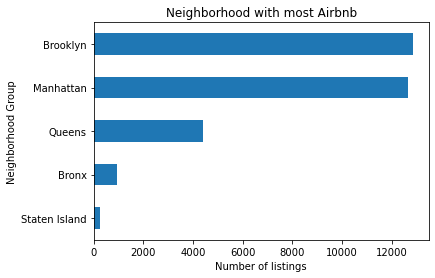

In [43]:
#neighborhood group with highest number of Airbnb
ng.plot.barh();
plt.title("Neighborhood with most Airbnb")
plt.ylabel('Neighborhood Group')
plt.xlabel('Number of listings');

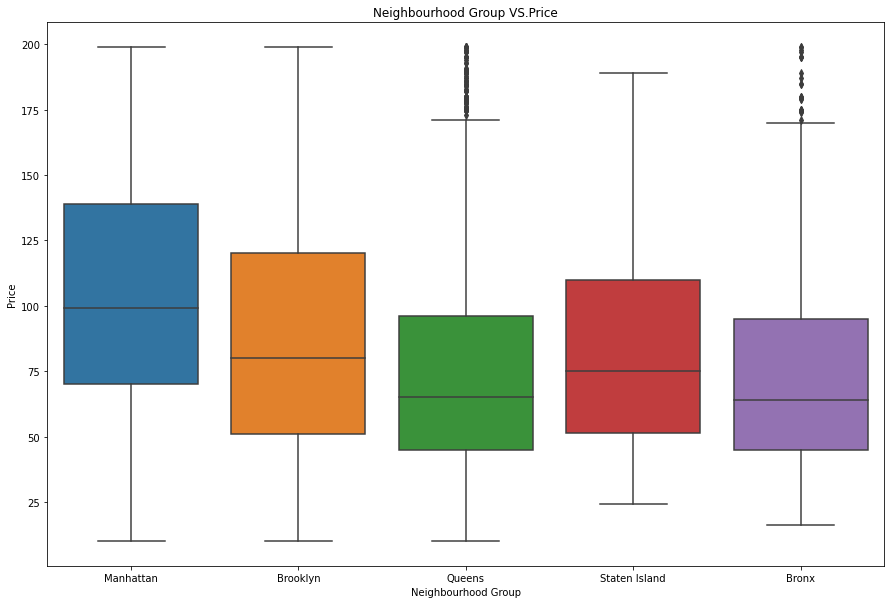

In [44]:
#boxplot of price vs neighbourhood group
plt.figure(figsize=(15,10))  
sns.boxplot(x=nyc['neighbourhood_group'],y= nyc['price'])
plt.title("Neighbourhood Group VS.Price")
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.xticks(rotation = 0);

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-45-1d48249a9cb8>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


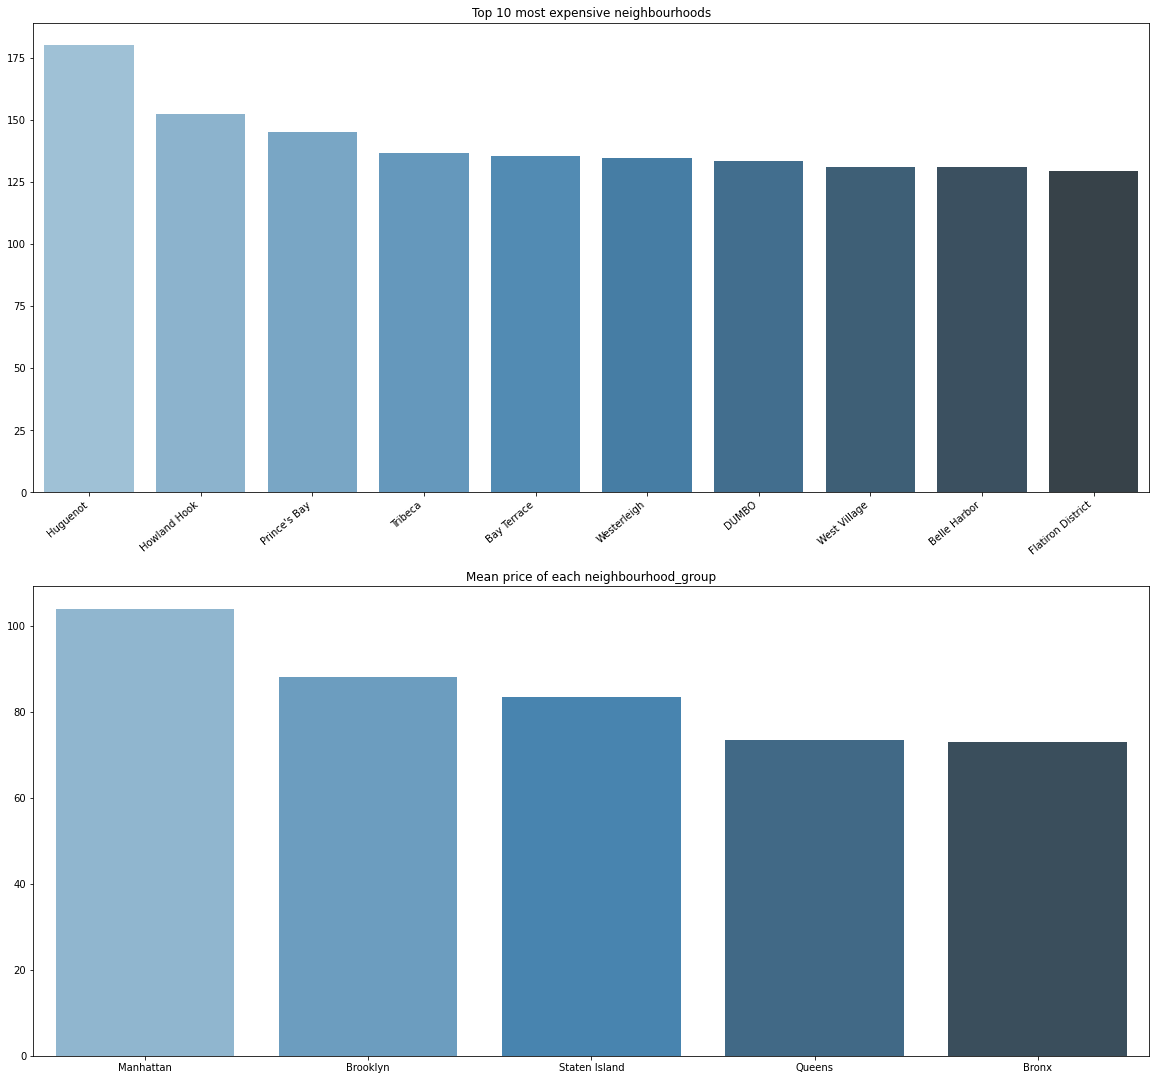

In [45]:
#Most expensive neighborhood
d = nyc.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(d.index.tolist()[:10], d.values[:10], ax=ax[0], palette=("Blues_d"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Top 10 most expensive neighbourhoods')

d = nyc.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=("Blues_d"))
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Mean price of each neighbourhood_group')

fig.show()

In [46]:
nyc['neighbourhood_group'].value_counts().sum()

31063

In [47]:
(16553+14474)/37012

0.8382956878850103

Manhattan and Brooklyn are two places with the most Airbnb houses, accounting for 83% of total Airbnb in NYC. The reason behind this is that most touristy destinations are in those two main places, while in the three other neighbourhood groups (Queens, Bronx, Staten Island) have more residential areas and fewer places to visit. At the same time, the mean price for each neighborhood is higher for Manhattan and Brooklyn, going against the law of demand supply.  

Generally, the price distribution of Airbnb in NYC averages around 100-200 dollars per night depending on the area. Now, let's look at price distribution for our two most popular neighborhood.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


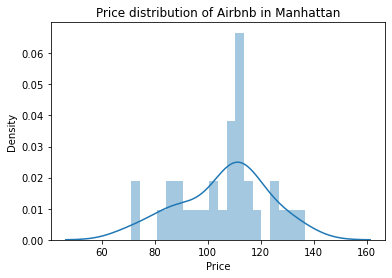

In [48]:
#price distribution of airbnb in Manhattan
nyc1 = nyc[nyc.neighbourhood_group == "Manhattan"][["neighbourhood","price"]]
mht = nyc1.groupby("neighbourhood").mean()
sns.distplot(mht, bins=20)
plt.title("Price distribution of Airbnb in Manhattan")
plt.xlabel('Price')
#plt.ylabel('% of listings in NYC')
plt.show();

Majority of the Airbnb in Manhattan price their properties for $110 per night.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


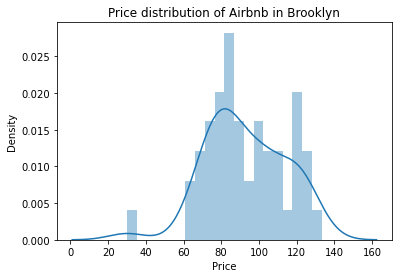

In [49]:
#price distribution of airbnb in Brooklyn
nyc2 = nyc[nyc.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
bl = nyc2.groupby("neighbourhood").mean()
sns.distplot(bl, bins=20)
plt.title("Price distribution of Airbnb in Brooklyn")
plt.xlabel('Price')
#plt.ylabel('% of listings in NYC')
plt.show();

The price distribution of Airbnb in Brooklyn averages around 60-130 dollars per night, with majority price at $80.

### 3. Room type

In [50]:
rt = nyc.value_counts('room_type').sort_values(ascending=True)
rt

room_type
Hotel room           156
Shared room          639
Entire home/apt    14226
Private room       16042
dtype: int64

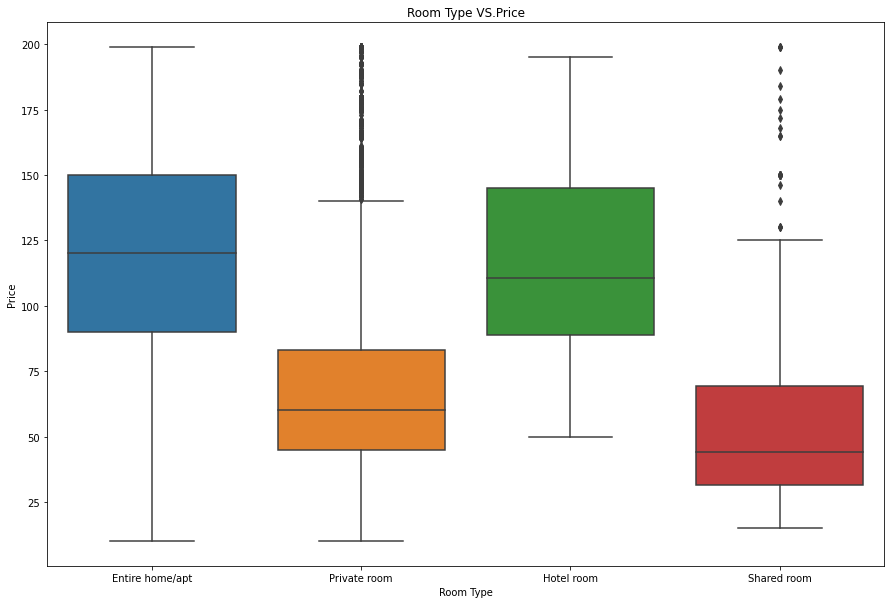

In [51]:
#boxplot of price vs room type
plt.figure(figsize=(15,10))  
sns.boxplot(x=nyc['room_type'],y= nyc['price'])
plt.title("Room Type VS.Price")
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation = 0);

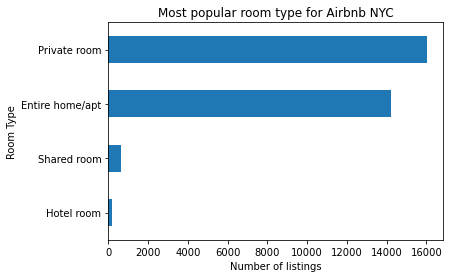

In [52]:
#What kind of room type can we find in these airbnb?
rt.plot.barh();
plt.title("Most popular room type for Airbnb NYC")
plt.ylabel('Room Type')
plt.xlabel('Number of listings');

In [53]:
nyc['room_type'].value_counts().sum()

31063

In [54]:
(19397+16630)/37012

0.9733870096185021

The maximum number of rooms listed on Airbnb are entire home/apartments and private rooms, accounting for 97% of total airbnb rooms in NYC. 
There is a very small number of shared rooms and hotel rooms listed on Airbnb.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


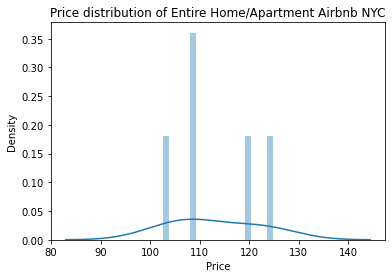

In [55]:
#price distribution of entire home/apt
nyc3 = nyc[nyc.room_type == "Entire home/apt"][["neighbourhood_group","price"]]
entire = nyc3.groupby("neighbourhood_group").mean()
sns.distplot(entire, bins=20)
plt.title("Price distribution of Entire Home/Apartment Airbnb NYC")
plt.xlabel('Price')
plt.show();

There are only 2 ranges of price for entire home/apartment room type; $100-110 and $120-$125.

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


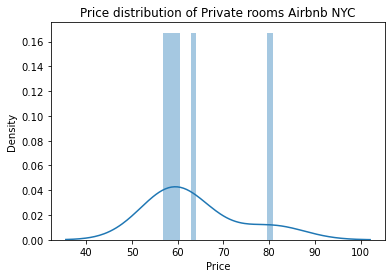

In [56]:
#price distribution of private rooms
nyc4 = nyc[nyc.room_type == "Private room"][["neighbourhood_group","price"]]
private = nyc4.groupby("neighbourhood_group").mean()
plt.title("Price distribution of Private rooms Airbnb NYC")
plt.xlabel('Price')
sns.distplot(private, bins=20)
plt.show()

There are only 2 ranges of price for private room type; $57-65 and $78-92.

### 4. Reviews

In [57]:
nyc["reviews_per_month"] = nyc.reviews_per_month.astype(float)

C:\Users\ACDMY8\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


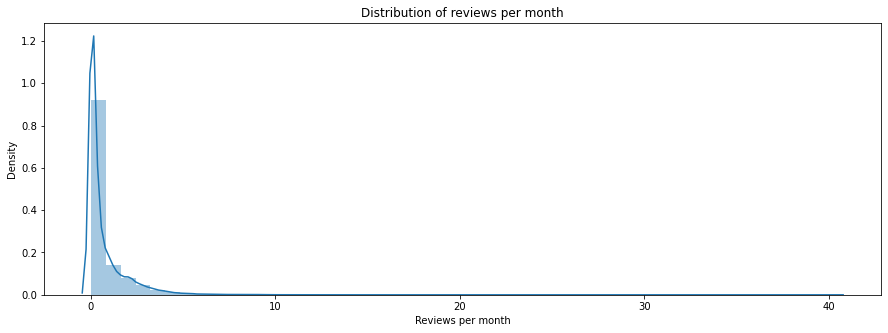

In [58]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(nyc.reviews_per_month)
plt.title("Distribution of reviews per month")
plt.xlabel('Reviews per month')
plt.show()

Most of the houses listed on Airbnb has an average of around 1-5 reviews a month and this number may vary sometimes even up to 40.

In [59]:
#10 most reviewed listings in NYC
top_reviewed_listings=nyc.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23016,Enjoy great views of the City with FREE PARKING!,244361589,Manhattan,Theater District,40.75876,-73.98846,Hotel room,77,1,753,34.33,11,310
23007,Large Private Suite in the Heart of Midtown,244559229,Manhattan,Chelsea,40.74871,-73.99168,Private room,92,1,598,27.06,11,363
12050,THE PRIVACY DEN ~ 5 MINUTES TO JFK,97086824,Queens,Springfield Gardens,40.66960,-73.76489,Entire home/apt,51,1,591,11.14,1,166
10084,Entire New Apartment in Park Slope / Gowanus,379619,Brooklyn,Sunset Park,40.66556,-73.99296,Private room,110,2,564,9.67,1,88
778,Cozy Room in Lively East Village,2267153,Manhattan,East Village,40.72760,-73.98347,Private room,39,1,541,5.15,3,56
136,Private Room on Historic Sugar Hill,277379,Manhattan,Harlem,40.82510,-73.94287,Private room,41,1,531,4.45,2,269
23739,King Room City,259169672,Manhattan,Midtown,40.74623,-73.98499,Hotel room,79,1,525,30.82,11,78
3390,Williamsburg Penthouse Guestroom,6642777,Brooklyn,Williamsburg,40.71133,-73.95358,Private room,51,1,515,6.52,2,83
1598,Williamsburg Penthouse Hideaway,6642777,Brooklyn,Williamsburg,40.71024,-73.95170,Private room,51,1,505,5.42,2,87
832,My Little Guest Room in Flushing,2680820,Queens,Flushing,40.75578,-73.81948,Private room,45,1,501,4.77,3,350


In [60]:
#average price per night for top 10 most reviewed properties
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 63.6


### 5. Minimum nights people stay

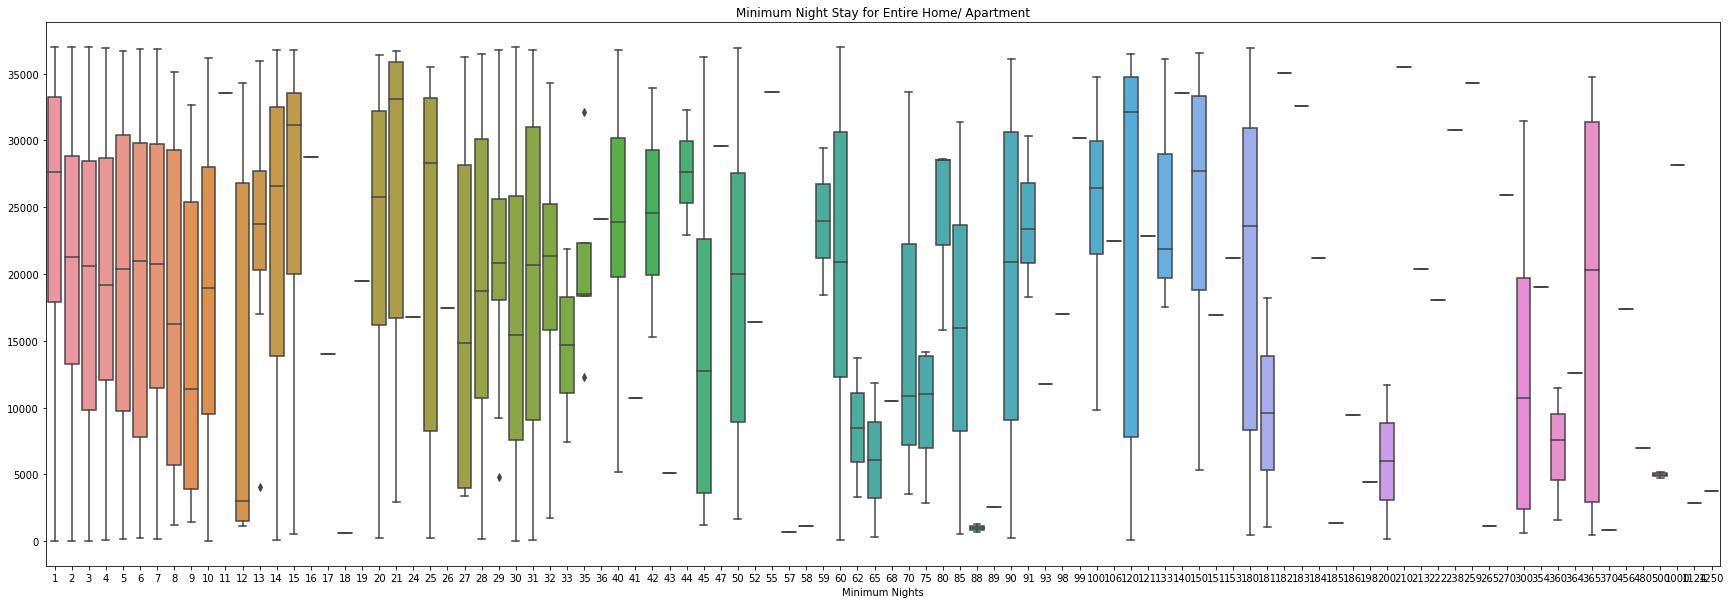

In [61]:
#minimum stay for entire home/apt
nyc5 = nyc[nyc.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(30,10))
ax = sns.boxplot(y= nyc5.index,x= nyc5.values)
plt.title("Minimum Night Stay for Entire Home/ Apartment")
plt.xlabel("Minimum Nights")
plt.show();

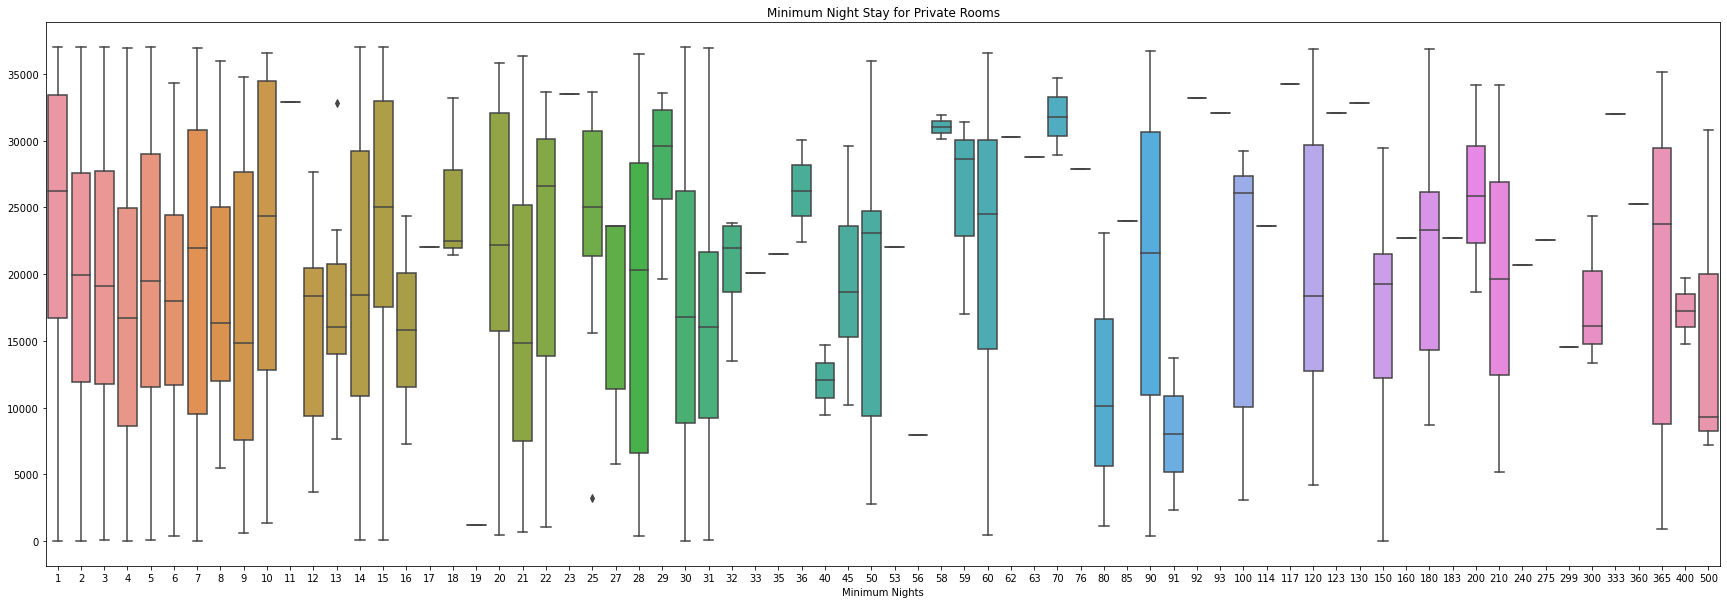

In [62]:
#minimum stay for private rooms
nyc6 = nyc[nyc.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(30,10))
ax = sns.boxplot(y= nyc6.index,x= nyc6.values)
plt.title("Minimum Night Stay for Private Rooms")
plt.xlabel("Minimum Nights")
plt.show()

### 6. Mapping

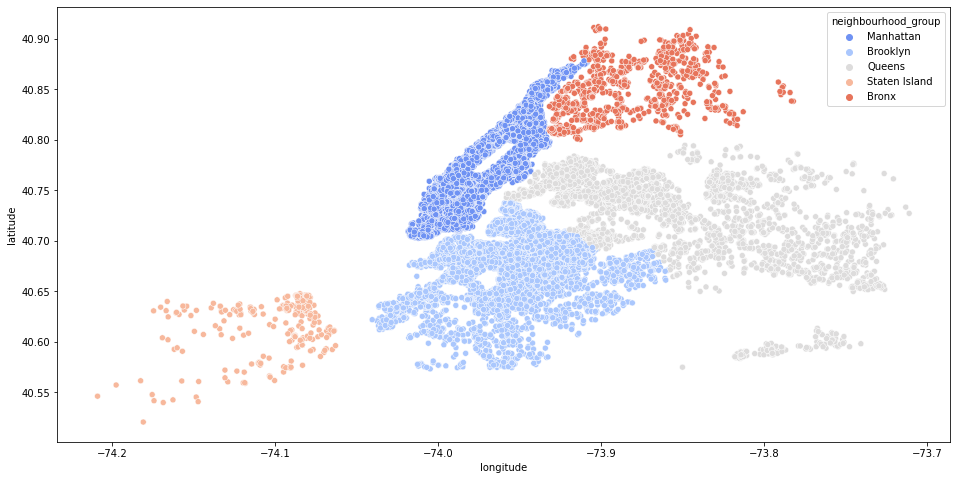

In [63]:
#neighborhood group
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=nyc.latitude,x=nyc.longitude,hue=nyc.neighbourhood_group,palette="coolwarm")
plt.show()

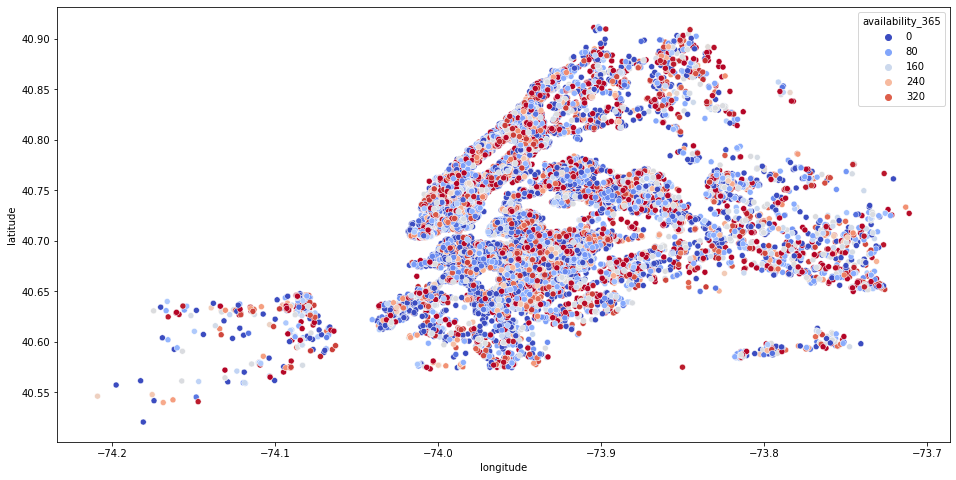

In [64]:
#numbers of rooms available in different area
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=nyc.latitude,x=nyc.longitude,hue=nyc.availability_365,palette="coolwarm")
plt.show()

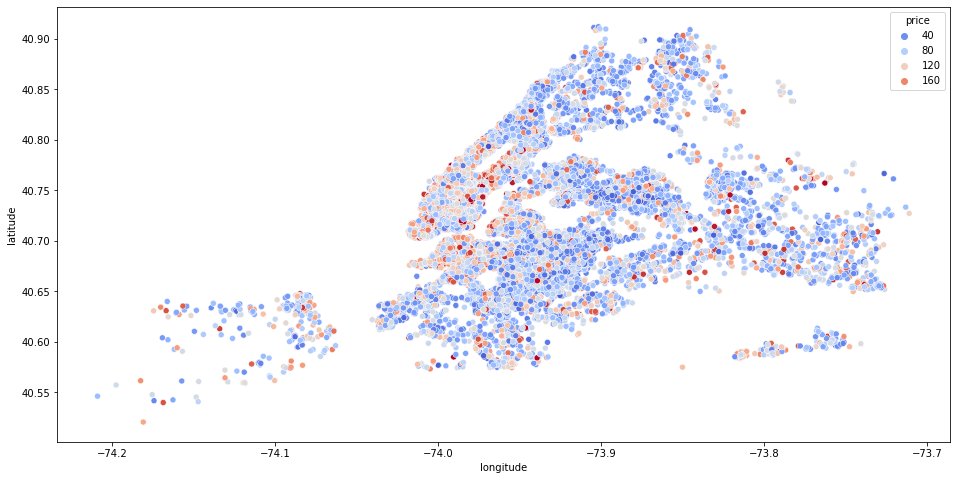

In [65]:
#price of rooms available in different area
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=nyc.latitude,x=nyc.longitude,hue=nyc.price,palette="coolwarm")
plt.show()

### 7. Ranking

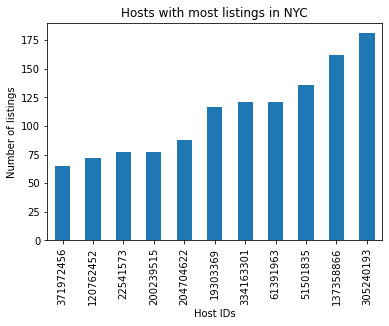

In [66]:
nyc10 = nyc.value_counts('host_id')[:11].sort_values(ascending=True)
nyc10.plot.bar()
plt.title("Hosts with most listings in NYC")
plt.xlabel('Host IDs')
plt.ylabel('Number of listings');

In [67]:
#who is this host
nyc[nyc['host_id'] == 107434423].head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
17145,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Manhattan,Financial District,40.70558,-74.00838,Entire home/apt,176,30,1,0.03,255,365
21288,Bright UES 1BR w/Doorman 15m walk to Central P...,107434423,Manhattan,Upper East Side,40.77234,-73.95098,Entire home/apt,199,30,0,0.00,255,148
21578,Thoughtful UWS Studio w/ Gym near Central Park...,107434423,Manhattan,Upper West Side,40.78986,-73.97315,Entire home/apt,183,30,0,0.00,255,249
21580,"Stylish Tribeca Studio w/ Gym, Doorman + Valet...",107434423,Manhattan,Tribeca,40.71383,-74.01024,Entire home/apt,179,30,0,0.00,255,324
21581,Sparkling Midtown Studio w/ Gym near Times Squ...,107434423,Manhattan,Hell's Kitchen,40.76304,-73.98696,Entire home/apt,178,30,0,0.00,255,332


### 8. Keywords

Find out if there is popular keywords on the listings.

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction import text 
import requests
import re
import random
import json
import time

In [69]:
def review_to_words(nyc):
    new_list = []
    for raw_review in nyc:
        
    #Remove HTML.
        review_text = re.sub('\(https:.*?\)','', str(raw_review))
    
    #Remove substrings that start with 'https' or 'http'
        review_text = re.sub(r"((https)|(http))\S*", "", review_text)
        
    #Remove substrings with commonly used domains
        review_text = re.sub(r"(\S(?=.*(\.com|\.net|\.org|\.info))\S*)", "", review_text)
        
    #Remove slash and hyphens
        review_text = re.sub(r"(/s*\/*)|(\s-\s)", "", review_text)
        
    #Remove hyphenated numerals
        review_text = re.sub(r"[0-9]+-[0-9]+", "", review_text)

    #Remove new-line, tabs, carriage returns, and apostrophes that are followed by a space character
        review_text = re.sub(r"(\n\s+)|(\t\s+)|(\r\s+)|(\'\s+)", "", review_text)

    #Remove non-letters.
        letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    #Convert to lower case, split into individual words.
        words = letters_only.lower().split()
        
    #Convert the stopwords to a set.
        stops = set(stopwords.words('english'))
    
    #Remove stopwords.
        meaningful_words = [w for w in words if w not in stops]
                                                    
    #Lemmatizing as I want to keep the context and meaning of its base form
        lemmatizer = WordNetLemmatizer()
        old_list = []
                                       
        for word in meaningful_words:
            if not word in stops:
                old_list.append(lemmatizer.lemmatize(word))
                
    #Join the words back into one string separated by space
        new_list.append(" ".join(old_list))
     
    return new_list

In [70]:
nyc['name'] = review_to_words(nyc['name'])
nyc

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,skylit midtown castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,0.35,2,365
1,whole flr wprivate bdrm bath kitchen pls read,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,4.99,1,249
2,blissartsspace,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,0.35,1,365
3,large furnished room near b way,8967,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,3.31,1,343
4,cozy clean guest roomfamily apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,0.85,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37006,beautiful cosy bedroom apartment,146343834,Manhattan,Financial District,40.70508,-74.00868,Entire home/apt,103,2,0,0.00,1,17
37007,cozy one bedroom full kitchen near manhattan,251455701,Queens,Woodside,40.74415,-73.90941,Entire home/apt,90,3,0,0.00,2,365
37009,natural light filled home upper east side,305240193,Manhattan,Midtown,40.75774,-73.96173,Private room,63,30,0,0.00,181,1
37010,spacious living heart upper east side,305240193,Manhattan,Upper East Side,40.76242,-73.95966,Private room,67,30,0,0.00,181,360


In [71]:
#let's see frequency of words with more focused vocab
list_of_words_nyc = " ".join(nyc.name).split()
list_of_words_nyc

['skylit',
 'midtown',
 'castle',
 'whole',
 'flr',
 'wprivate',
 'bdrm',
 'bath',
 'kitchen',
 'pls',
 'read',
 'blissartsspace',
 'large',
 'furnished',
 'room',
 'near',
 'b',
 'way',
 'cozy',
 'clean',
 'guest',
 'roomfamily',
 'apt',
 'lovely',
 'room',
 'garden',
 'best',
 'area',
 'legal',
 'rental',
 'stop',
 'manhattan',
 'studio',
 'uptown',
 'sanctuary',
 'w',
 'private',
 'bath',
 'month',
 'month',
 'ues',
 'beautiful',
 'blue',
 'room',
 'perfect',
 'parent',
 'privacy',
 'garden',
 'furnished',
 'bedroom',
 'next',
 'central',
 'park',
 'maison',
 'de',
 'sirenes',
 'bohemian',
 'luminous',
 'apartment',
 'midtown',
 'pied',
 'terre',
 'modern',
 'br',
 'nyc',
 'east',
 'village',
 'spacious',
 'bedroom',
 'luxe',
 'building',
 'large',
 'b',
 'b',
 'style',
 'room',
 'lovely',
 'room',
 'garden',
 'best',
 'area',
 'legal',
 'country',
 'space',
 'city',
 'enjoy',
 'downtown',
 'nyc',
 'best',
 'bet',
 'harlem',
 'stop',
 'fr',
 'manhattan',
 'private',
 'suite',
 'land

In [72]:
#create a dictionary to find out frequency of words
mydict = {}
for word in list_of_words_nyc:
    if word in mydict:
        mydict[word] = mydict[word] + 1
    else:
        mydict[word] = 1

In [73]:
#sorting the words frequency in descending order
sort_freq = sorted(mydict.items(), key=lambda x: x[1], reverse=True)

for i in sort_freq[:10]:
    print(i[0], i[1])

room 7686
bedroom 5228
private 5165
apartment 4256
cozy 3377
studio 2812
apt 2760
brooklyn 2523
spacious 2305
manhattan 2180


In [74]:
#adding the frequency of words dictionary into a dataframe
nyc_freq = pd.DataFrame(sort_freq, columns=['word','frequency'])
nyc_freq

,word,frequency
0,room,7686
1,bedroom,5228
2,private,5165
3,apartment,4256
4,cozy,3377
...,...,...
6428,buildingbrooklyn,1
6429,subwaybus,1
6430,wwasherdryer,1
6431,minimally,1


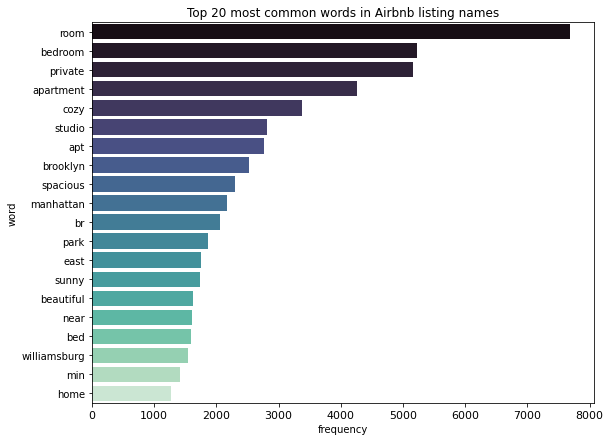

In [75]:
#create a bar chart for better visualization
plt.figure(figsize=(9,7))
sns.barplot(x='frequency', y='word', data=nyc_freq[:20], palette='mako', orient='h')
plt.title('Top 20 most common words in Airbnb listing names')
plt.xticks(fontsize=11);

From the above barchart, we observe the top 20 words used in listings' name. The hosts usually simply describe their property in a short and specific form for easier search. The type of room, i.e. bedroom, private, apartment, studio, apt, shows that there are no specific popular terms that are used for names. Characteristic of the room, i.e. cozy, spacious, beautiful, sunny, is used to attract potential travellers as well. 

## Modeling

### Dummy

In our dataset, we have only nominal data. Therefore, we need to convert these data into numerical in order to process with linear regression. I will create dummy variables for columns with nominal data.

In [76]:
#create a list of all features that need to be dummied 
dummy_columns = ['neighbourhood_group','neighbourhood','room_type']

In [77]:
#create dummy columns
nyc = pd.get_dummies(nyc, columns = dummy_columns);

In [78]:
nyc.head()

,name,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,skylit midtown castle,2845,40.75362,-73.98377,100,30,48,0.35,2,365,...,0,0,0,0,0,0,1,0,0,0
1,whole flr wprivate bdrm bath kitchen pls read,4869,40.68514,-73.95976,73,1,386,4.99,1,249,...,0,0,0,0,0,0,1,0,0,0
2,blissartsspace,7356,40.68688,-73.95596,60,30,50,0.35,1,365,...,0,0,0,0,0,0,0,0,1,0
3,large furnished room near b way,8967,40.76468,-73.98315,79,2,474,3.31,1,343,...,0,0,0,0,0,0,0,0,1,0
4,cozy clean guest roomfamily apt,7490,40.80178,-73.96723,75,2,118,0.85,1,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
nyc.shape

(31063, 234)

In [80]:
#drop the first dummy columns 
for dummy in dummy_columns:
    dummy_list = [col for col in nyc.columns if dummy in col]
    nyc.drop(columns = dummy_list[0], inplace = True)

In [81]:
nyc.shape

(31063, 231)

In [82]:
nyc['name']

0                                skylit midtown castle
1        whole flr wprivate bdrm bath kitchen pls read
2                                       blissartsspace
3                      large furnished room near b way
4                      cozy clean guest roomfamily apt
                             ...                      
37006                 beautiful cosy bedroom apartment
37007     cozy one bedroom full kitchen near manhattan
37009        natural light filled home upper east side
37010            spacious living heart upper east side
37011         find cozy upper west side furnished home
Name: name, Length: 31063, dtype: object

### Scaling

In [83]:
from datetime import datetime
import datetime as dt
from datetime import timedelta
import geopy.distance
import time
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline as Pipeline_sk

In [84]:
#create X and y variables
X = nyc.drop(columns = ['price','name','host_id'], axis = 1) 
features = list(X.columns) 
y = nyc['price']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

In [86]:
X_train.shape

(27956, 228)

In [87]:
X_test.shape

(3107, 228)

In [88]:
y_train.shape

(27956,)

In [89]:
y_test.shape

(3107,)

In [90]:
#scale and fit the data
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [91]:
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

### Model Benchmark

In [92]:
#calculate the mean of target variable
y_avg = y_test.mean()
y_avg

91.43514644351464

In [93]:
#create baseline prediction
baseline_preds = [y_avg for i in y]

In [94]:
#calculate baseline R2 scores 
r2_score(y,baseline_preds)

-0.0001448036679436715

A negative 𝑅2 means that the regression model is performing worse than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

In [95]:
#calculate baseline RMSE
np.sqrt(mean_squared_error(y, baseline_preds))

43.955235334524225

Our baseline model shows that our prediction will have approximaltely +/- 43 errors. Our goal is to at least improve upon baseline by 10%

In [96]:
0.1*43.95

4.3950000000000005

### Linear Regression

In [97]:
#instantiate and fit linear model
lr = LinearRegression()
lr.fit(X_scaled_train,y_train)

LinearRegression()

In [98]:
#R2 on train dataset
lr.score(X_scaled_train, y_train)

0.45112928652835294

Cross-validate the  𝑅2  of an ordinary linear regression model with 5 cross-validation folds.

In [99]:
#R2 on unseen data from linear regression
lr_cv_scores = cross_val_score(lr, X_scaled_train, y_train,cv=5) 
lr_cv_scores.mean()

-4.100117253307673e+26

In [100]:
#RMSE on unseen data from linear regression
lr_rmse_cv_scores = np.abs(cross_val_score(lr, X_scaled_train, y_train,cv= 5, scoring='neg_root_mean_squared_error'))
lr_rmse_cv_scores.mean()

637048016165039.8

R2 score is negative, which indicates that the linear regression is performing far worse than baseline model.The linear model is extremely overfitting and has redundant variables. Also, the high RMSE score shows that linear regression will give out high errors in our prediction. Therefore, we should look for other models to regularize th size of coefficients and better predict our data.

### Elastic net regression

First, let's find out optimal alpha value and l1 ratio for elastic net regression

In [101]:
#find out the optimal alpha and l1 ratio
l1_ratios = np.linspace(0.01, 1.0, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=5, verbose=1, max_iter=5000)
optimal_enet.fit(X_scaled_train, y_train)
print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.12406989830414977
1.0


The optimal l1 ratio is 1, indicating that lasso regression is the best performing model for our data. However, let's try both Ridge and Lasso models.

### Ridge Regression

First, let's find out optimal alpha value for ridge regression

In [102]:
#find out which alpha to choose
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_scaled_train, y_train)
print(optimal_ridge.alpha_)

376.49358067924675


Cross-validate the  𝑅2  of a ridge regression model with 5 cross-validation folds.

In [103]:
#Ridge R2 score on train data
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_cv_scores = cross_val_score(ridge, X_scaled_train, y_train, cv=5)
ridge_cv_scores.mean()

0.4410595321563834

In [104]:
#Ridge RMSE on train data 
ridge_rmse_cv_scores = np.abs(cross_val_score(ridge, X_scaled_train, y_train,cv= 5, scoring='neg_root_mean_squared_error'))
ridge_rmse_cv_scores.mean()

32.881892293967006

Ridge regression performs much better than Linear regression as R2 score from ridge regression is 44.1%. Ridge regression is able to manage multicollinearity and get a good out-of-sample results as the estimated error is also a lot lesser than linear regression's. 

### Lasso Regression

First, let's find out optimal alpha value for lasso regression

In [105]:
#find out which alpha to choose
optimal_lasso = LassoCV(n_alphas=100, cv=5)
optimal_lasso.fit(X_scaled_train, y_train)
print(optimal_lasso.alpha_)

0.12406989830414977


Cross-validate the $R^2$ of lasso regression model with 5 cross-validation folds.

In [106]:
#Lasso R2 score on train data
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_cv_scores = cross_val_score(lasso, X_scaled_train, y_train, cv=5)
lasso_cv_scores.mean()

0.4423657832750523

In [107]:
#Lasso RMSE score on train data
lasso_rmse_cv_scored = np.abs(cross_val_score(lasso, X_scaled_train, y_train,cv= 5, scoring='neg_root_mean_squared_error'))
lasso_rmse_cv_scored.mean()

32.84325797420754

Lasso regression performs slightly better than ridge regression as R2 score from lasso regression is 44.2. Lasso regression is also able to manage multicollinearity and eliminates features that are not useful. It chooses the best of correlated variables and zero-out the redundant ones, resulting in slightly less estimated error compared to ridge model.

## Model Evaluation

Fit the model to the training data, and evaluate the training and test scores below.

### Lasso Regression 

In [108]:
#lasso model fitting
lasso.fit(X_scaled_train,y_train) 

Lasso(alpha=0.12406989830414977)

In [109]:
print('Training R2 (Lasso)', lasso.score(X_scaled_train,y_train)) #how model performs on train data
print('Training CV R2 (Lasso)', lasso_cv_scores.mean()) #estimate of how model is going to perform on test data
print('Testing R2 (Lasso)', lasso.score(X_scaled_test,y_test)) #how model actually performs on test data

Training R2 (Lasso) 0.4499912080156626
Training CV R2 (Lasso) 0.4423657832750523
Testing R2 (Lasso) 0.4594271901739625


In [110]:
print('Training RMSE (Lasso)', np.sqrt(mean_squared_error(y_train, lasso.predict(X_scaled_train)))) #estimate error on train data
print('Training CV RMSE (Lasso)', lasso_rmse_cv_scored.mean()) #estimate error on test data
print('Testing RMSE (Lasso)', np.sqrt(mean_squared_error(y_test, lasso.predict(X_scaled_test)))) #actual estimate error on test data

Training RMSE (Lasso) 32.622897873988656
Training CV RMSE (Lasso) 32.84325797420754
Testing RMSE (Lasso) 32.07138555100914


Now, I will create a dataframe to show the model's coefficient, so we can see which feature has the most impact on theprice. Since we only want to see positive effect on target variable, we will take absolute value of the coefficients. 

In [111]:
#create a dataframe showing features with the highest absolute coefficient; best features of Airbnb NYC
lasso_coef_nyc = pd.DataFrame({'column': features, 'coef' : lasso.coef_, 'abs_coef' : np.abs(lasso.coef_)})
lasso_coef_nyc[lasso_coef_nyc['abs_coef']>0].sort_values(by ='abs_coef', ascending = False).head(10)

,column,coef,abs_coef
226,room_type_Private room,-23.991519,23.991519
227,room_type_Shared room,-8.746492,8.746492
7,neighbourhood_group_Manhattan,8.458207,8.458207
5,calculated_host_listings_count,-4.861826,4.861826
220,neighbourhood_Williamsburg,3.498463,3.498463
212,neighbourhood_Washington Heights,-2.966992,2.966992
103,neighbourhood_Harlem,-2.616622,2.616622
4,reviews_per_month,-2.586928,2.586928
112,neighbourhood_Inwood,-1.812235,1.812235
100,neighbourhood_Greenpoint,1.693487,1.693487


In [112]:
#create a dataframe showing features with the highest absolute coefficient; worst features of Airbnb NYC
lasso_coef_nyc[lasso_coef_nyc['abs_coef']>0].sort_values(by ='abs_coef', ascending = True).head(10)

,column,coef,abs_coef
96,neighbourhood_Graniteville,-0.000772,0.000772
170,neighbourhood_Rego Park,-0.002225,0.002225
116,neighbourhood_Jamaica Hills,0.005187,0.005187
72,neighbourhood_East New York,-0.007935,0.007935
19,neighbourhood_Baychester,-0.008443,0.008443
153,neighbourhood_North Riverdale,0.009884,0.009884
59,neighbourhood_Country Club,0.010835,0.010835
205,neighbourhood_Unionport,0.011225,0.011225
171,neighbourhood_Richmond Hill,0.011572,0.011572
184,neighbourhood_Silver Lake,-0.014542,0.014542


## Conclusion and Recommendation



|Regression Model|Training CV $R^2$ Score|Training CV RMSE Score|
|---|---|---|
|Baseline Model|-0.000|44|
|Linear Model|-4.100|637048016165039|
|Ridge Model|0.441|33|
|Lasso Model|0.442|33|

|Regression Model|Testing $R^2$ Score|Testing RMSE Score|
|---|---|---|
|Lasso Model|0.459|32|

Comparing between the models, Lasso regression model is the best model because it is best at predicting unseen data as well as giving the least estimated errors. However, the model is slightly underfit because it has high bias and low variance. We can consider removing more outliers from train dataset to lower RMSE.

Looking at coefficients, we found the best features to be used to predict the house price is mainly private room, followed by shared room, calculated host listing counts, and neighborhood such as Manhattan and Williamsburg. On the other hand, the worst features are neighborhood such as Graniteville, Rego Park, Jamaica Hills, and East New York. So, these features are the key features of the house that hosts or real estate developers should consider in order to make highest return from rental price. 

The model can be used on other city housing data as well since top features in the model should be similar to any other cities. However, the model can be improved by having many other features such as host ratings, type of amentities provided, free cancellation option, number of occupants, to get a better prediction on the rental price. 

Some further steps that we can consider are to include many more datetime features i.e. when the property was listed, whether interaction terms will improve the prediction, what are other outliers we can remove, and whether the prediction is still accurate when apply with other cities housing data. Also, we can further investigate NLP of reviews and recommendation system for future users.